In [1]:
#  SHARPE RATIO MATHEMATICALLY GIVES THE RELATTION BETWEEN THE MEAN DAILY RETURNS AND AND THE VOLATILITY OF THE STOCK
# It is measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations

In [2]:
# SHARPE RATIO (S) = (Expected Portfolio return - Risk free return)/(Portfolio standard deviation)

In [3]:
import pandas as pd
import quandl

In [38]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [39]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [40]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [41]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Cummulated Daily Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [42]:
aapl

,Adj. Close,Cummulated Daily Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
...,...,...
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034


In [43]:
aapl.tail()

,Adj. Close,Cummulated Daily Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [44]:
# 40% in amzn
# 30% in apple 
# 20% in cisco
# 10% in ibm

In [45]:
for stock_df , allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.1,.4]):
    stock_df['Allocation'] = stock_df['Cummulated Daily Return']*allo 

In [46]:
aapl.tail()

,Adj. Close,Cummulated Daily Return,Allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [47]:
# POSITON VALUE = ALLOCATION x MONEY INVESTED
# Let money invested be $ 1 million
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Value'] = stock_df['Allocation'] * 1000000

In [48]:
aapl.head()

,Adj. Close,Cummulated Daily Return,Allocation,Position Value
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [49]:
Pos_Values_of_all_stocks = [aapl['Position Value'],cisco['Position Value'],ibm['Position Value'],amzn['Position Value']]
portfolio_val = pd.concat(Pos_Values_of_all_stocks,axis=1)

In [50]:
Pos_Values_of_all_stocks = [aapl['Position Value'],cisco['Position Value'],ibm['Position Value'],amzn['Position Value']]
portfolio_val = pd.concat(Pos_Values_of_all_stocks,axis=1)
portfolio_val.columns = ['AAPL POS','CISCO POS','IBM POS','AMZN POS']
portfolio_val['Total POS'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,Total POS
Date,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

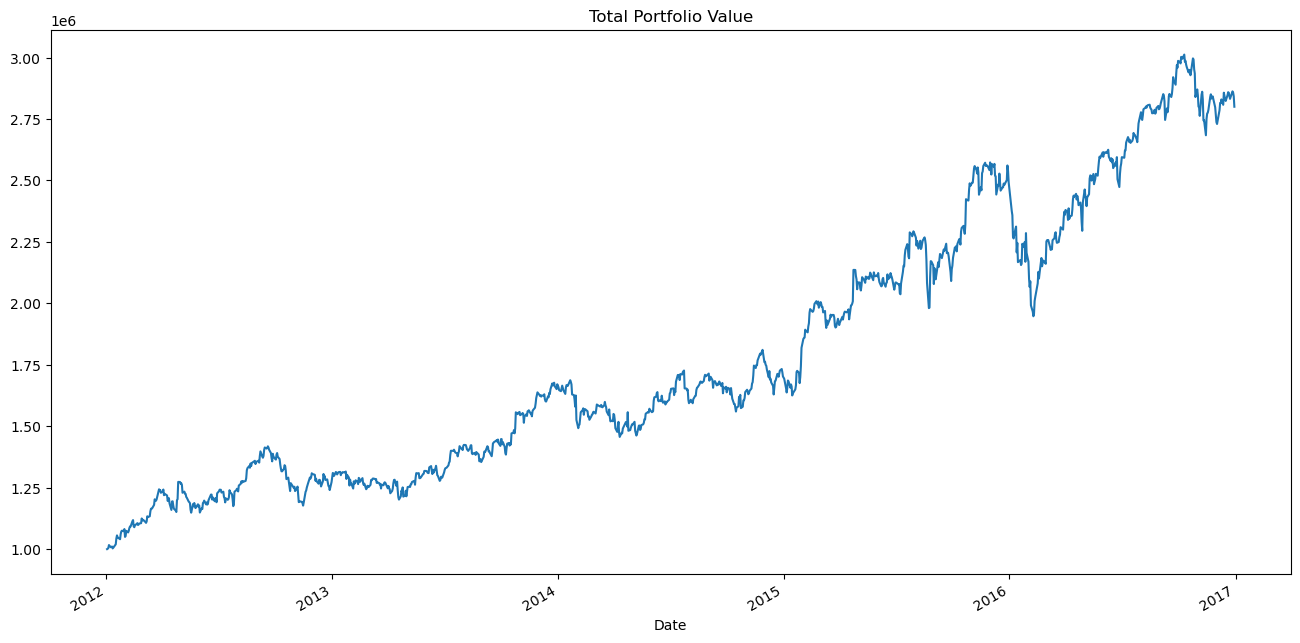

In [52]:
portfolio_val['Total POS'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

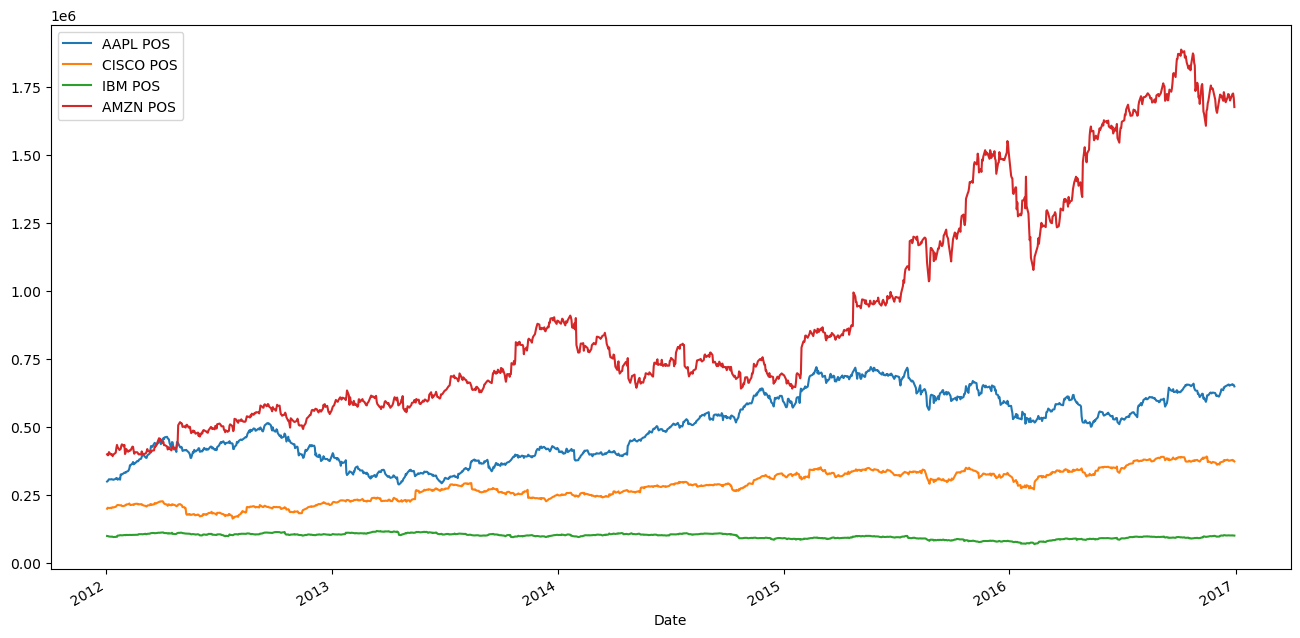

In [53]:
portfolio_val[['AAPL POS','CISCO POS','IBM POS','AMZN POS']].plot(figsize=(16,8))